In [50]:
import pandas as pd
import seaborn as sns

In [51]:
df= pd.read_csv('Data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [52]:
df.shape

(3333, 21)

In [53]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [54]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [55]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
NV     66
WA     66
CO     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
DE     61
NE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [56]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [57]:
#getting customer churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [65]:
# percentage of customers that churn
churned=df[df['churn']==True].shape[0]
not_churned=df[df['churn']==False].shape[0]
print(churned/(churned+not_churned))

0.14491449144914492


<AxesSubplot:xlabel='churn', ylabel='count'>

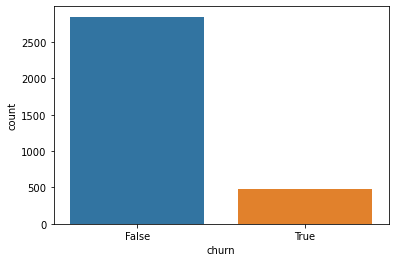

In [66]:
#getting churn visualization
sns.countplot(x='churn', data=df)